In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('../LP-1 Dataset/user_behavior_dataset.csv')

In [3]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
df.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [5]:
df.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [6]:
df = df.drop(['User ID'],axis=1)

In [7]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [8]:
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

for col in ['Gender','Operating System','Device Model']:
    df[col] = labels.fit_transform(df[[col]])

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
df

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,0,0,393,6.4,1872,67,1122,40,1,4
1,1,0,268,4.7,1331,42,944,47,0,3
2,3,0,154,4.0,761,32,322,42,1,2
3,0,0,239,4.8,1676,56,871,20,1,3
4,4,1,187,4.3,1367,58,988,31,0,3
...,...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1,2
696,3,0,316,6.8,1965,68,1201,59,1,4
697,0,0,99,3.1,942,22,457,50,0,2
698,2,0,62,1.7,431,13,224,44,1,1


In [10]:
x = df.iloc[:,:9]

In [11]:
x

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,0,0,393,6.4,1872,67,1122,40,1
1,1,0,268,4.7,1331,42,944,47,0
2,3,0,154,4.0,761,32,322,42,1
3,0,0,239,4.8,1676,56,871,20,1
4,4,1,187,4.3,1367,58,988,31,0
...,...,...,...,...,...,...,...,...,...
695,4,1,92,3.9,1082,26,381,22,1
696,3,0,316,6.8,1965,68,1201,59,1
697,0,0,99,3.1,942,22,457,50,0
698,2,0,62,1.7,431,13,224,44,1


In [12]:
y = df['User Behavior Class']

In [14]:
s = SVC(kernel='linear')

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
s.fit(x_train,y_train)

SVC(kernel='linear')

In [16]:
s.predict(x_test)

array([5, 5, 5, 4, 5, 2, 1, 2, 1, 2, 2, 4, 5, 5, 4, 1, 2, 5, 4, 3, 1, 3,
       3, 1, 4, 4, 4, 1, 3, 1, 2, 4, 5, 2, 4, 3, 1, 3, 5, 5, 1, 3, 1, 4,
       2, 4, 4, 2, 3, 4, 4, 2, 4, 4, 2, 3, 2, 5, 4, 2, 4, 1, 2, 5, 3, 2,
       1, 1, 3, 1, 5, 3, 5, 4, 5, 1, 5, 3, 1, 4, 3, 2, 5, 4, 2, 3, 1, 4,
       2, 4, 3, 2, 2, 4, 3, 4, 4, 5, 3, 1, 3, 2, 5, 5, 2, 3, 1, 1, 1, 4,
       3, 1, 2, 3, 3, 4, 3, 1, 2, 3, 1, 5, 3, 5, 1, 2, 5, 3, 1, 5, 3, 4,
       4, 3, 4, 1, 1, 1, 1, 1, 2, 4, 5, 1, 3, 4, 2, 4, 1, 5, 1, 2, 5, 5,
       5, 4, 1, 3, 2, 3, 5, 5, 2, 2, 4, 2, 3, 5, 3, 1, 2, 3, 4, 2, 3],
      dtype=int64)

In [17]:
accuracy_score(y_test,s.predict(x_test))

1.0

In [18]:
confusion_matrix(y_test,s.predict(x_test))

array([[36,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0],
       [ 0,  0, 36,  0,  0],
       [ 0,  0,  0, 37,  0],
       [ 0,  0,  0,  0, 32]], dtype=int64)

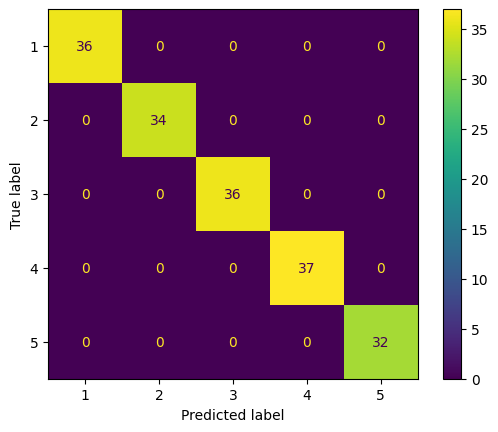

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test,s.predict(x_test))

In [21]:
df = pd.DataFrame({"Actual": y_test, "Predicted": s.predict(x_test)})

In [22]:
df

,Actual,Predicted
165,5,5
335,5,5
573,5,5
554,4,4
360,5,5
...,...,...
47,2,2
3,3,3
290,4,4
313,2,2
